# Description

Hourly average energy consumption, daily profile for Romania 2017-2022. Data source : Transelectrica.

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

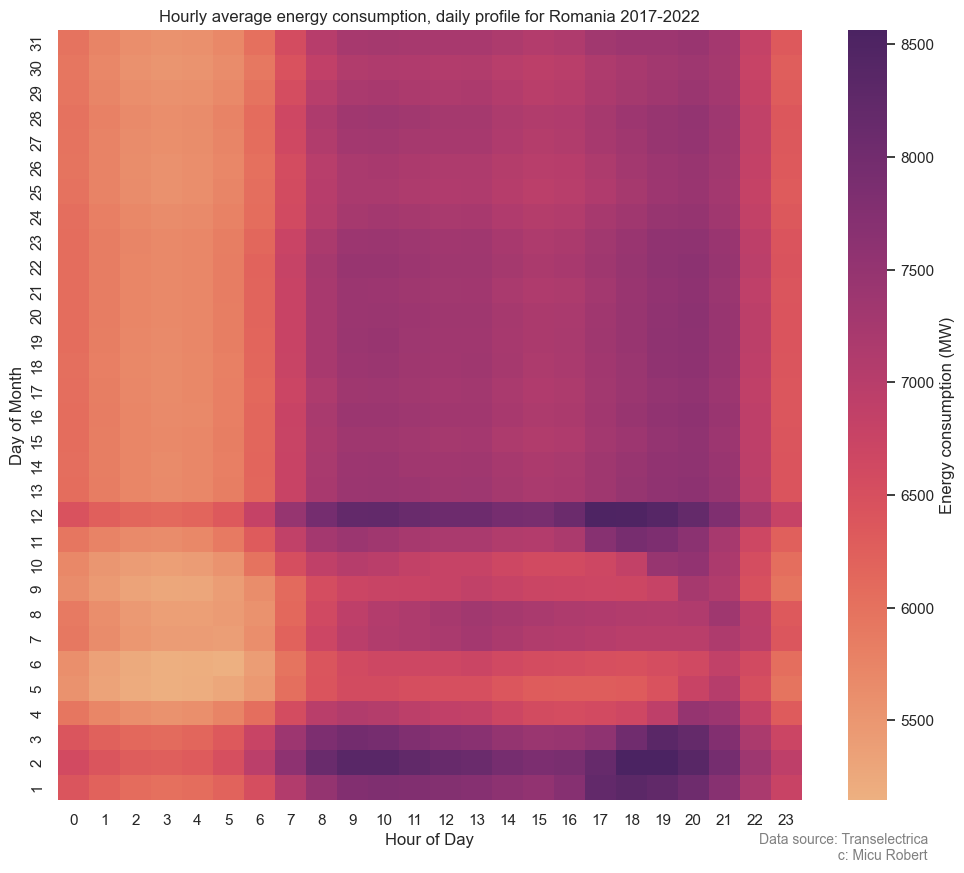

In [60]:
df = pd.read_excel('SEN_2017_2022.xlsx')
df = df.iloc[:,:2]
df.columns = ['timestamp', 'value']

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour

hourly_avg = df.groupby(['day', 'hour'])['value'].mean()
hourly_avg = hourly_avg.reset_index()

pivot_table = hourly_avg.pivot(index='day', columns='hour', values='value')

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(pivot_table.iloc[::-1,:], cmap='flare', ax=ax, cbar_kws={'label': 'Energy consumption (MWh)'})
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Day of Month')
ax.set_title('Hourly average energy consumption, daily profile for Romania 2017-2022')
plt.figtext(0.85, 0.05, 'Data source: Transelectrica\n c: Micu Robert', horizontalalignment='right', fontsize=10, color='gray')
fig.savefig('2017-2022-profile.png')